In [1]:
# Customer Understanding MLR Analysis
# Ashley Varma
# IMT 572 B
# Autumn 2021

# Load in dataset
import pandas as pd
data = pd.read_csv("data\Marketing_Campaign.csv",sep='\t')

# Preview of customer dataset
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
# Important import statements
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import datetime
from datetime import date
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

# Statistical description of dataset
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [3]:
# Correlation Heat Map
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\ashle\Anaconda2\lib\site-packages\matplotlib\colors.py:507: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1,2.76245e-05,0.0130955,0.00240561,-0.00257989,-0.0465241,-0.0228783,0.00460006,-0.00443722,-0.0244749,-0.00764156,-0.0134378,-0.0371658,-0.0189239,-0.00344014,-0.0149269,-0.00744618,-0.03604,-0.0253867,-0.00751702,-0.0216142,-0.015061,0.033883,nan,nan,-0.0219678
Year_Birth,2.76245e-05,1,-0.161791,0.230176,-0.352111,-0.0198711,-0.157773,-0.0179172,-0.0308724,-0.0416254,-0.0181326,-0.0618182,-0.0608456,-0.14504,-0.121275,-0.128272,0.121139,0.0617745,-0.0605096,0.00712254,-0.00593032,-0.00653928,-0.0301275,nan,nan,0.0213252
Income,0.0130955,-0.161791,1,-0.428669,0.0191334,-0.00396976,0.57865,0.430842,0.584633,0.438871,0.440744,0.325916,-0.0831009,0.387878,0.589162,0.529362,-0.553088,-0.0161744,0.1844,0.335943,0.27682,0.0875448,-0.0272245,nan,nan,0.133047
Kidhome,0.00240561,0.230176,-0.428669,1,-0.0361331,0.00882673,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.0146744,-0.1616,-0.205634,-0.172339,-0.0817164,0.0402065,nan,nan,-0.0800078
Teenhome,-0.00257989,-0.352111,0.0191334,-0.0361331,1,0.0161977,0.00484641,-0.176764,-0.26116,-0.204187,-0.162475,-0.0217253,0.387741,0.1555,-0.110769,0.0506952,0.134884,-0.0426769,0.0388864,-0.19105,-0.14009,-0.0156049,0.00313771,nan,nan,-0.154446
Recency,-0.0465241,-0.0198711,-0.00396976,0.00882673,0.0161977,1,0.0160639,-0.00430564,0.0230561,0.00107897,0.0226696,0.0166933,-0.00109837,-0.0107263,0.0251105,0.000798836,-0.0214447,-0.0329906,0.0188256,0.000128909,-0.0192828,-0.00178133,0.0132311,nan,nan,-0.198437
MntWines,-0.0228783,-0.157773,0.57865,-0.496297,0.00484641,0.0160639,1,0.389637,0.562667,0.399753,0.386581,0.387516,0.0109399,0.542265,0.635226,0.6421,-0.320653,0.0622018,0.373286,0.472613,0.354133,0.205907,-0.0390071,nan,nan,0.247254
MntFruits,0.00460006,-0.0179172,0.430842,-0.372581,-0.176764,-0.00430564,0.389637,1,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.0147269,0.0101522,0.215833,0.194748,-0.00977322,-0.00516629,nan,nan,0.125289
MntMeatProducts,-0.00443722,-0.0308724,0.584633,-0.437129,-0.26116,0.0230561,0.562667,0.543105,1,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.53947,0.0182718,0.102912,0.373769,0.309761,0.0430334,-0.0234831,nan,nan,0.236335
MntFishProducts,-0.0244749,-0.0416254,0.438871,-0.387644,-0.204187,0.00107897,0.399753,0.594804,0.568402,1,0.57987,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357226,0.0168428,0.199578,0.260762,0.0025767,-0.0209528,nan,nan,0.111331


In [4]:
# Spending variable creation
data['Age']=2021-data['Year_Birth']
data['Spending'] = data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [5]:
# Seniority variable creation
last_date = date(2021,12, 13)
data['Seniority'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30

In [6]:
# Rename columns for categorical clarity
data=data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
data = data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [7]:
# Group Marital Status feature values  
data['Marital_Status']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [8]:
# Rename Education feature values for categorical clarity
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [9]:
# Group Child based feature values & create discrete variable set from categorical variables
data['Children']=data['Kidhome']+data['Teenhome']
data['Has_child'] = np.where(data.Children> 0, 'Has child', 'No child')
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)

In [10]:
# Assign restructed dataset
data = data[['Age','Education','Marital_Status','Income','Spending','Has_child','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]

In [11]:
# Adjust data and drop outliers
data=data.dropna(subset=['Income'])
data=data[data['Income']<600000]

In [12]:
# Display data
data.head()

,Age,Education,Marital_Status,Income,Spending,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,64,Postgraduate,Alone,58138.0,1617,No child,No child,635,88,546,172,88,88
1,67,Postgraduate,Alone,46344.0,27,Has child,2 children,11,1,6,2,1,6
2,56,Postgraduate,In couple,71613.0,776,No child,No child,426,49,127,111,21,42
3,37,Postgraduate,In couple,26646.0,53,Has child,1 child,11,4,20,10,3,5
4,40,Postgraduate,In couple,58293.0,422,Has child,1 child,173,43,118,46,27,15


In [13]:
# New correlation heat map
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Income,Spending,Wines,Fruits,Meat,Fish,Sweets,Gold
Age,1,0.198064,0.113241,0.159225,0.0176531,0.0334988,0.0402651,0.020013,0.0640298
Income,0.198064,1,0.79265,0.688269,0.507959,0.692465,0.520351,0.523746,0.389204
Spending,0.113241,0.79265,1,0.893098,0.613249,0.845853,0.642311,0.60697,0.528599
Wines,0.159225,0.688269,0.893098,1,0.386977,0.568752,0.397602,0.390178,0.392588
Fruits,0.0176531,0.507959,0.613249,0.386977,1,0.547796,0.593407,0.571581,0.396443
Meat,0.0334988,0.692465,0.845853,0.568752,0.547796,1,0.573507,0.535048,0.359328
Fish,0.0402651,0.520351,0.642311,0.397602,0.593407,0.573507,1,0.583804,0.427056
Sweets,0.020013,0.523746,0.60697,0.390178,0.571581,0.535048,0.583804,1,0.357336
Gold,0.0640298,0.389204,0.528599,0.392588,0.396443,0.359328,0.427056,0.357336,1


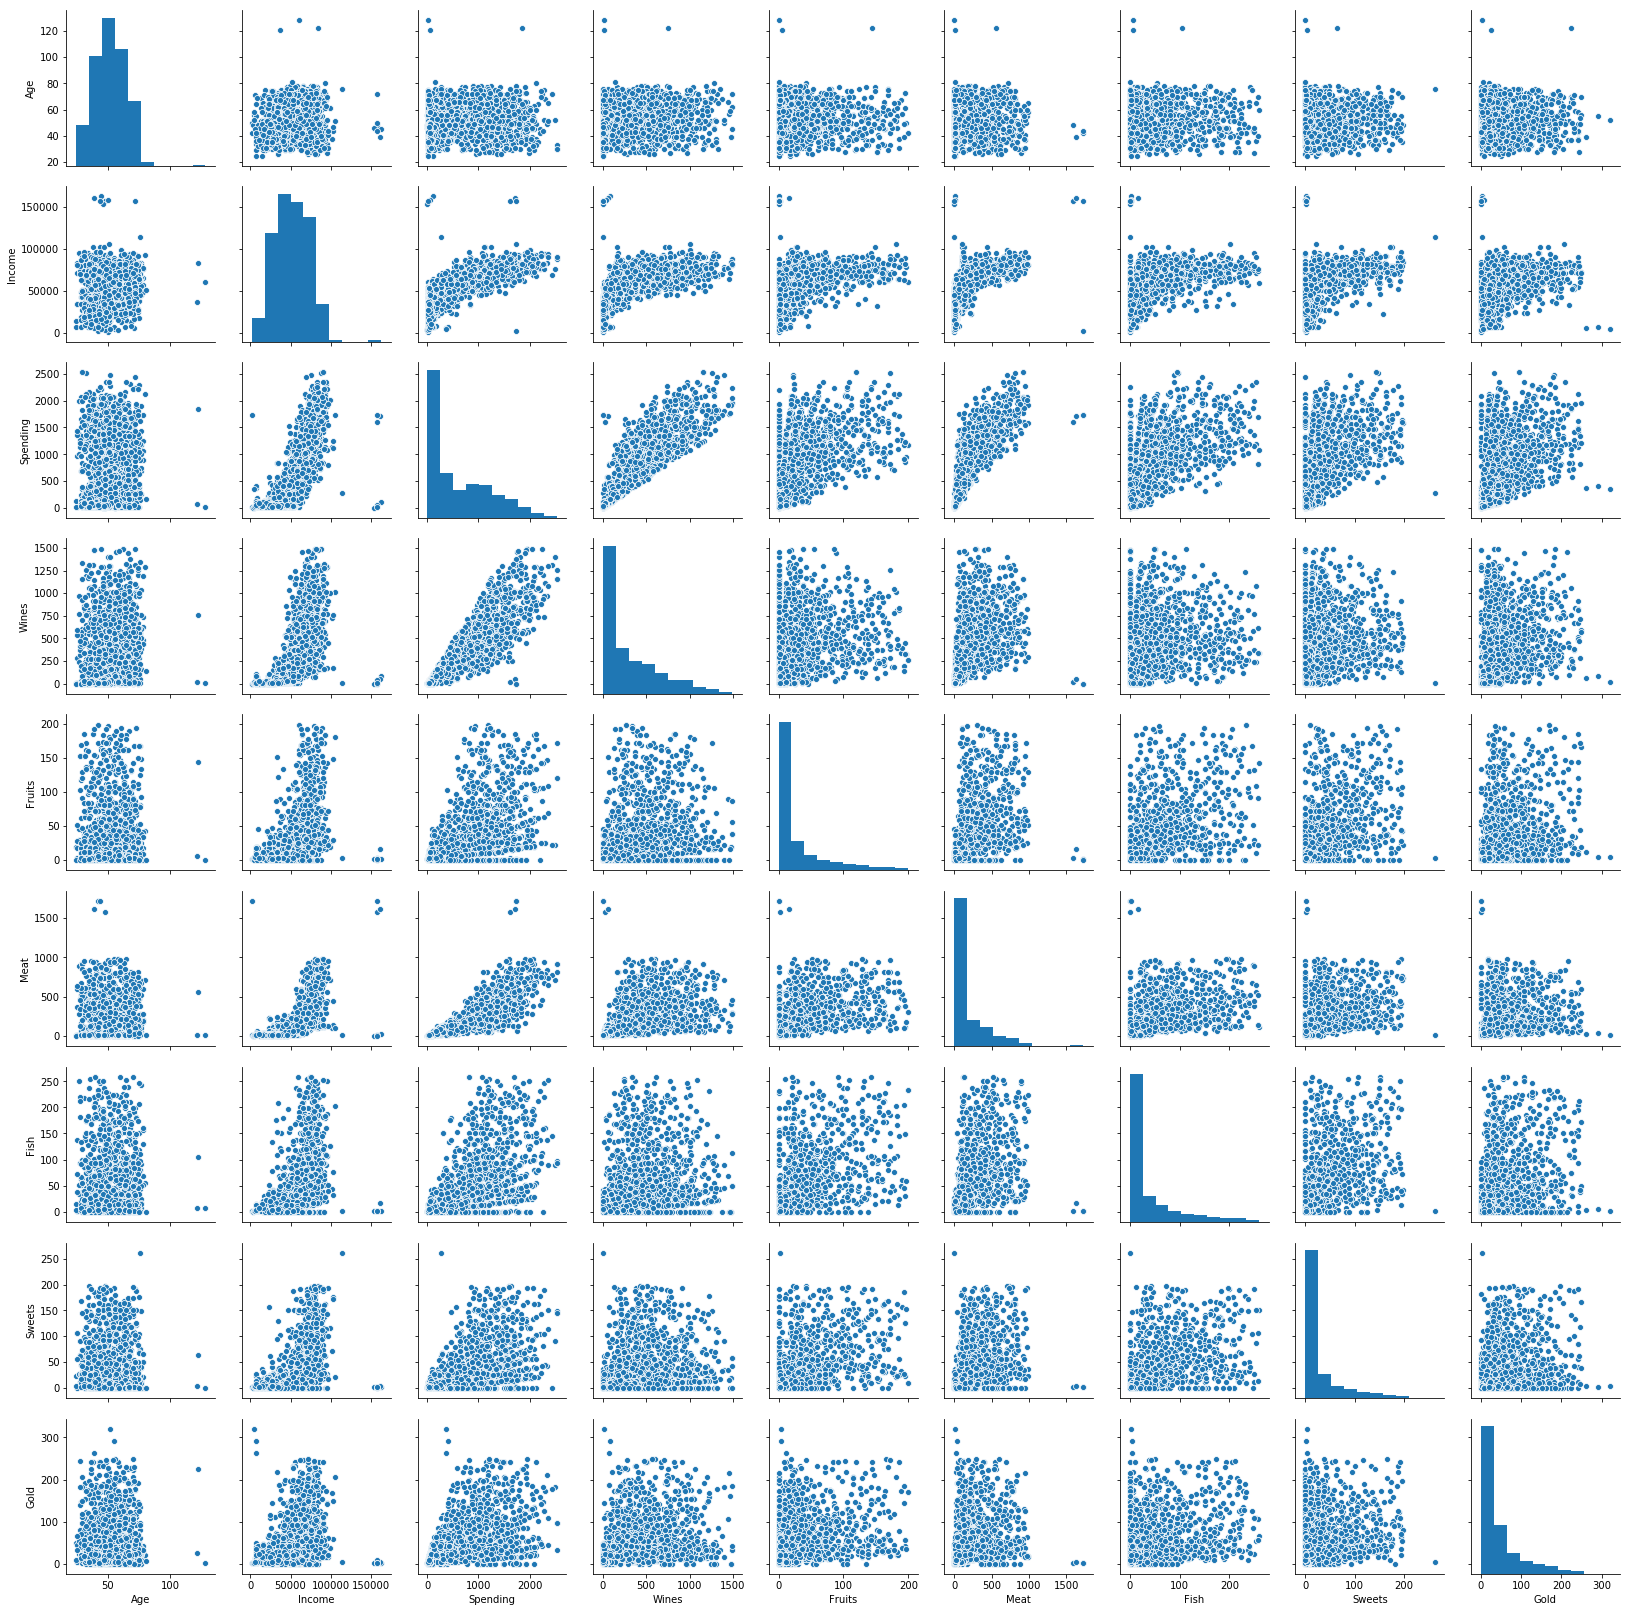

In [14]:
# Correlation of feature values in scatterplot form
sns.pairplot(data)

In [15]:
# Strongest correlatory values
x = data[['Wines', 'Income', 'Meat']]
y = data['Spending']

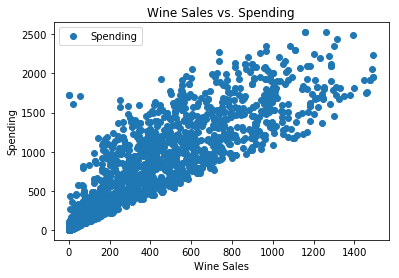

In [16]:
# Better view of Strongest correlatory feature values scatterplots
data.plot(x='Wines', y='Spending', style='o') 
plt.title('Wine Sales vs. Spending') 
plt.xlabel('Wine Sales') 
plt.ylabel('Spending') 
plt.show()

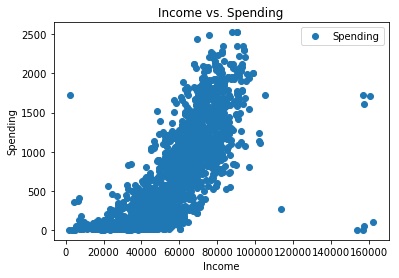

In [17]:
data.plot(x='Income', y='Spending', style='o') 
plt.title('Income vs. Spending') 
plt.xlabel('Income') 
plt.ylabel('Spending') 
plt.show()

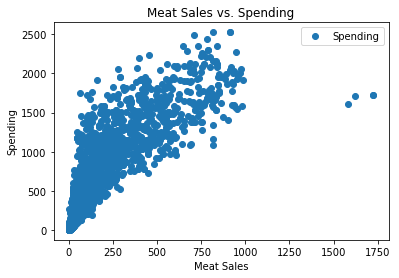

In [18]:
data.plot(x='Meat', y='Spending', style='o') 
plt.title('Meat Sales vs. Spending') 
plt.xlabel('Meat Sales') 
plt.ylabel('Spending') 
plt.show()

In [19]:
# Split data into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [20]:
# Fit the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
# Display intercept and coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

('Intercept: ', -30.459561272255087)
Coefficients:


[('Wines', 1.0218869704124116),
 ('Income', 0.002264911445203979),
 ('Meat', 1.2458314614469255)]

In [22]:
# Prediction values for test set
y_pred_mlr= mlr.predict(x_test)

In [23]:
# Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
412,1485,1600.491761
1469,1471,1425.287555
926,1149,1003.800298
2147,61,114.958238
1530,1513,1568.188660


In [24]:
# Evaluation of model
print('R squared Value: {:.2f}'.format(mlr.score(x,y)*100))
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Error:', meanAbErr)

R squared Value: 96.83
('Mean Square Error:', 12234.262693030923)
('Root Mean Square Error:', 110.6086013519334)
('Mean Absolute Error:', 76.41867981201274)


In [25]:
# Create PCA instance for a threshold of 0.75
pca = PCA(0.75) 
X_train1 = pca.fit_transform(x_train) 
X_test1 = pca.transform(x_test)

# Train LR model on training data to predict on testing and see results
linear_model = LinearRegression()
linear_model.fit(X_train1,y_train)
y_pred = linear_model.predict(X_test1)

# Intercept
print('Intercept: ')
print(linear_model.intercept_)

# Evaluate the prediction with R^2
r2 = r2_score(y_test,y_pred)
print('\nR2 Score: ')
print(r2)

# Evaluate the prediction with Adjusted R^2 
adjusted_r_squared = 1 - (1-linear_model.score(X_train1, y_train))*(len(y_train)-1)/(len(y_train)-X_train1.shape[1]-1)
print('\nAdjusted R2 Score: ')
print(adjusted_r_squared)

Intercept: 
609.5389390519186

R2 Score: 
0.5523207471468742

Adjusted R2 Score: 
0.6469847659818967


In [26]:
# Create PCA instance for a threshold of 0.85
pca2 = PCA(0.85) 
X_train1 = pca.fit_transform(x_train) 
X_test1 = pca.transform(x_test)

# Train LR model on training data to predict on testing and see results
linear_model = LinearRegression()
linear_model.fit(X_train1,y_train)
y_pred = linear_model.predict(X_test1)

# Intercept
print('Intercept: ')
print(linear_model.intercept_)

# Evaluate the prediction with R^2
r2 = r2_score(y_test,y_pred)
print('\nR2 Score: ')
print(r2)

# Evaluate the prediction with Adjusted R^2 
adjusted_r_squared = 1 - (1-linear_model.score(X_train1, y_train))*(len(y_train)-1)/(len(y_train)-X_train1.shape[1]-1)
print('\nAdjusted R2 Score: ')
print(adjusted_r_squared)

Intercept: 
609.5389390519186

R2 Score: 
0.5523207471468743

Adjusted R2 Score: 
0.6469847659818967


In [29]:
# Create PCA instance for a threshold of 0.95
pca3 = PCA(0.95) 
X_train1 = pca.fit_transform(x_train) 
X_test1 = pca.transform(x_test)

# Train LR model on training data to predict on testing and see results
linear_model = LinearRegression()
linear_model.fit(X_train1,y_train)
y_pred = linear_model.predict(X_test1)

# Intercept
print('Intercept: ')
print(linear_model.intercept_)

# Evaluate the prediction with R^2
r2 = r2_score(y_test,y_pred)
print('\nR2 Score: ')
print(r2)

# Evaluate the prediction with Adjusted R^2 
adjusted_r_squared = 1 - (1-linear_model.score(X_train1, y_train))*(len(y_train)-1)/(len(y_train)-X_train1.shape[1]-1)
print('\nAdjusted R2 Score: ')
print(adjusted_r_squared)

Intercept: 
609.5389390519186

R2 Score: 
0.5523207471468742

Adjusted R2 Score: 
0.6469847659818967


In [28]:
# P-values observed for independent variables
x_train_lm = sm.add_constant(x_train)
mlr = sm.OLS(y_train, x_train_lm).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.828e+04
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:45:49   Log-Likelihood:                -10786.
No. Observations:                1772   AIC:                         2.158e+04
Df Residuals:                    1768   BIC:                         2.160e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.4596      7.784     -3.913      0.000     -45.727     -15.192
Wines          1.0219      0.011     95.702      0.000       1.001       1.043
Income         0.0023      0.000     11.798      0.000       0.002       0.003
Meat           1.2458      0.016     79.227      0.000       1.215       1.277
==============================================================================
Omnibus:                      360.676   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1830.968
Skew:                           0.864   Prob(JB):                         0.00
Kurtosis:                       7.670   Cond. No.                     1.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""